In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import pearsonr
import pingouin as pg #paquete estadístico de código abierto https://pingouin-stats.org/build/html/index.html

In [3]:
df = pd.read_csv('housing.data', header=None, sep=r'\s+')
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
df.shape

(506, 14)

In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
df.dtypes.value_counts()

float64    12
int64       2
Name: count, dtype: int64

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


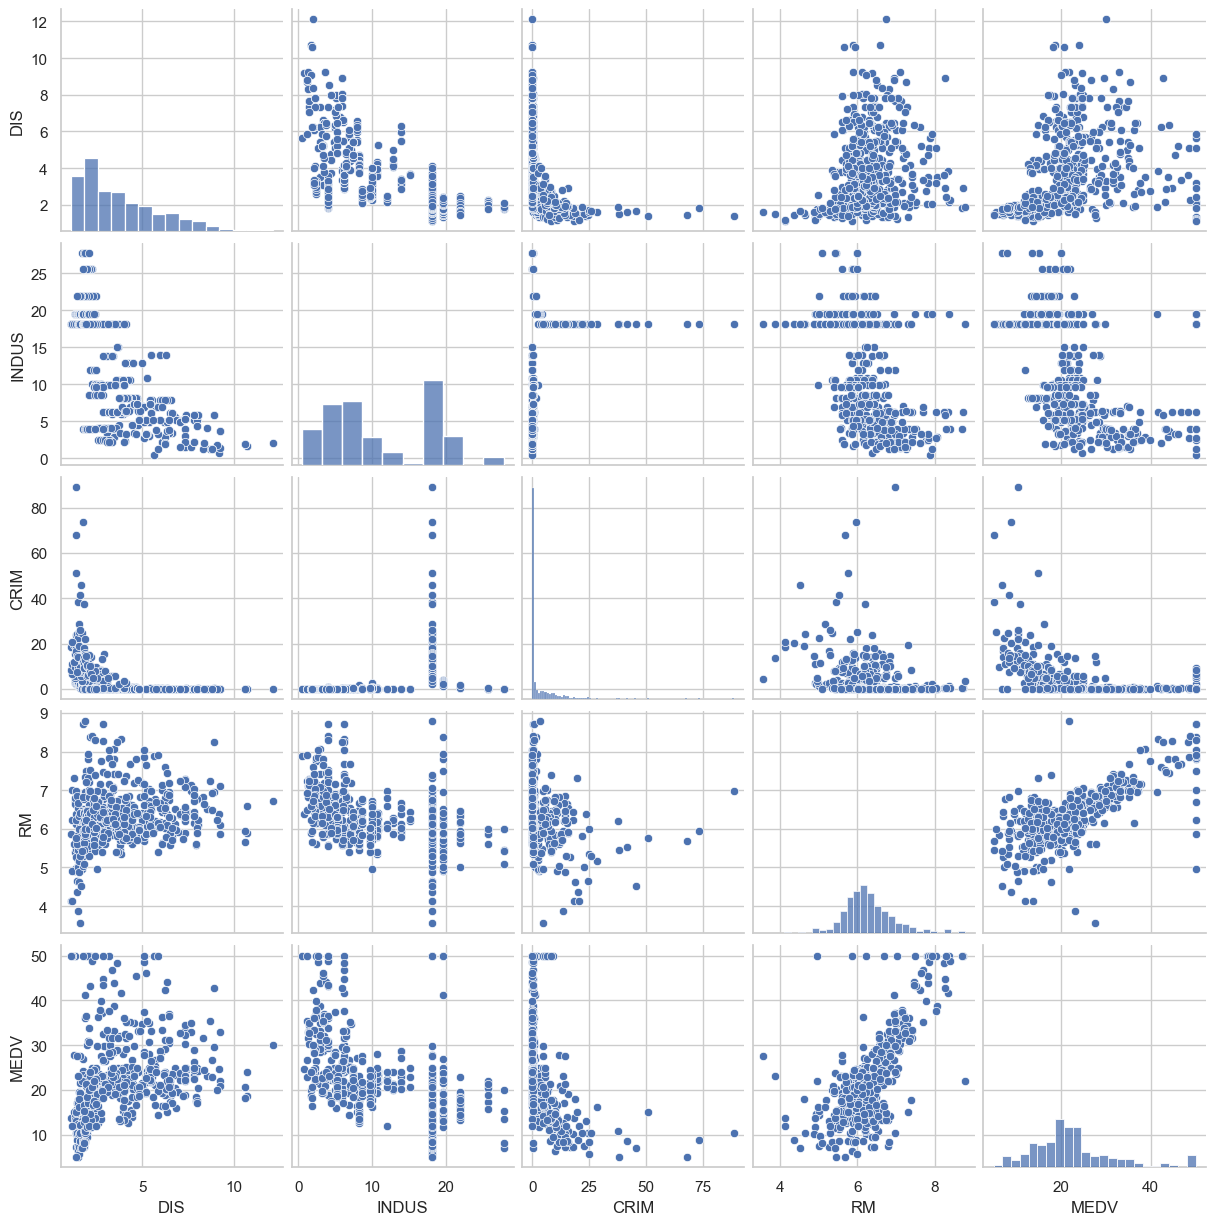

In [4]:
sns.set(style='whitegrid', context='notebook')
cols = ['DIS','INDUS','CRIM', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.show()

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [12]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [14]:
df.corr(method='spearman')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891
ZN,-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179
INDUS,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255
CHAS,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612
NOX,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609
RM,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576
AGE,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562
DIS,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857
RAD,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776
TAX,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411


In [15]:
df.corr(method='kendall')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.462057,0.521014,0.033948,0.603361,-0.211718,0.497297,-0.539878,0.563969,0.544956,0.312768,-0.264378,0.454837,-0.403964
ZN,-0.462057,1.000000,-0.535468,-0.039419,-0.511464,0.278134,-0.429389,0.478524,-0.234663,-0.289911,-0.361607,0.128177,-0.386818,0.339989
INDUS,0.521014,-0.535468,1.000000,0.075889,0.612030,-0.291318,0.489070,-0.565137,0.353967,0.483228,0.336612,-0.192017,0.465980,-0.418430
CHAS,0.033948,-0.039419,0.075889,1.000000,0.056387,0.048080,0.055616,-0.065619,0.021739,-0.037655,-0.115694,-0.033277,-0.041344,0.115202
NOX,0.603361,-0.511464,0.612030,0.056387,1.000000,-0.215633,0.589608,-0.683930,0.434828,0.453258,0.278678,-0.202430,0.452005,-0.394995
RM,-0.211718,0.278134,-0.291318,0.048080,-0.215633,1.000000,-0.187611,0.179801,-0.076569,-0.190532,-0.223194,0.032951,-0.468231,0.482829
AGE,0.497297,-0.429389,0.489070,0.055616,0.589608,-0.187611,1.000000,-0.609836,0.306201,0.360311,0.251857,-0.154056,0.485359,-0.387758
DIS,-0.539878,0.478524,-0.565137,-0.065619,-0.683930,0.179801,-0.609836,1.000000,-0.361892,-0.381988,-0.223486,0.168631,-0.409347,0.313115
RAD,0.563969,-0.234663,0.353967,0.021739,0.434828,-0.076569,0.306201,-0.361892,1.000000,0.558107,0.251913,-0.214364,0.287943,-0.248115
TAX,0.544956,-0.289911,0.483228,-0.037655,0.453258,-0.190532,0.360311,-0.381988,0.558107,1.000000,0.287769,-0.241606,0.384191,-0.414650


<Axes: >

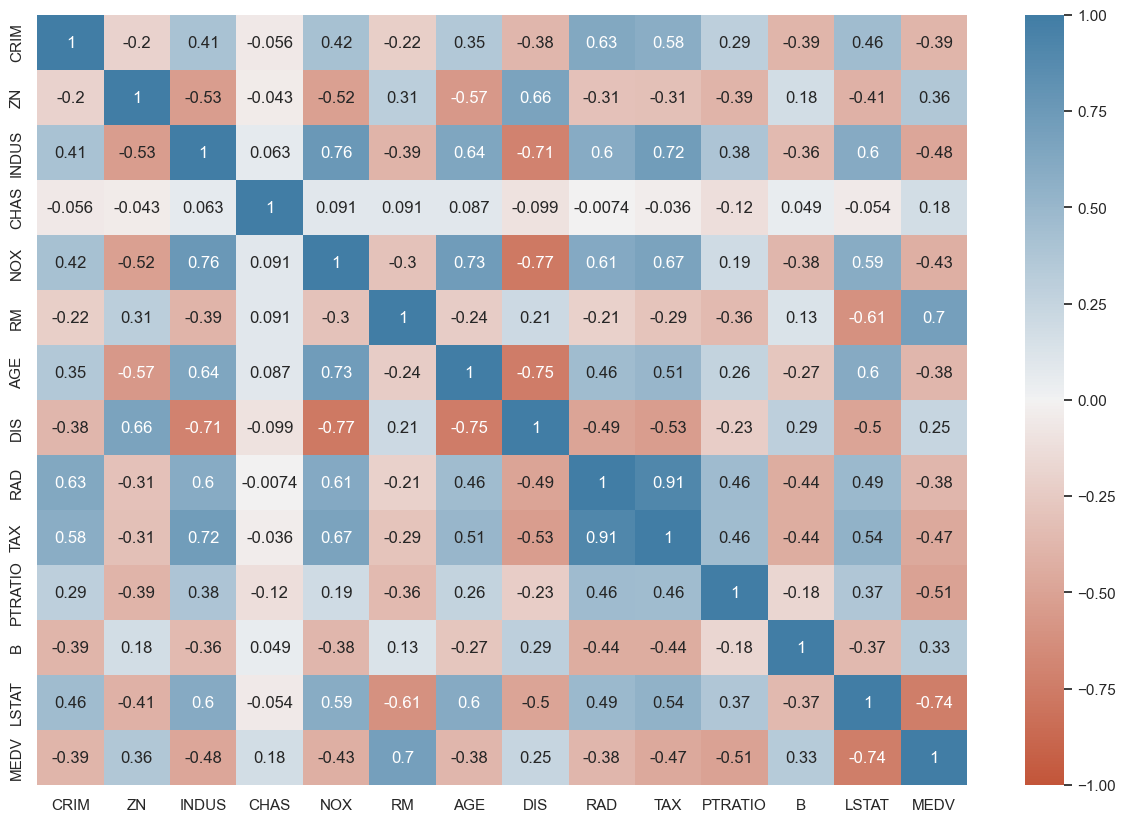

In [19]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(
    data=df.corr(method='pearson'),
    cmap=sns.diverging_palette(20,238, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    annot=True,
)

In [36]:
x=df.RM
y=df.MEDV
corr_mat=np.corrcoef(x,y)
corr_mat[0,1]

0.6953599470715395

In [37]:
# Correlación con outlier
r, p = stats.pearsonr(x, y)
print(f"Correlación Pearson con outlier: r={r}, p-value={p}")

Correlación Pearson con outlier: r=0.6953599470715394, p-value=2.487228871008081e-74


<Axes: >

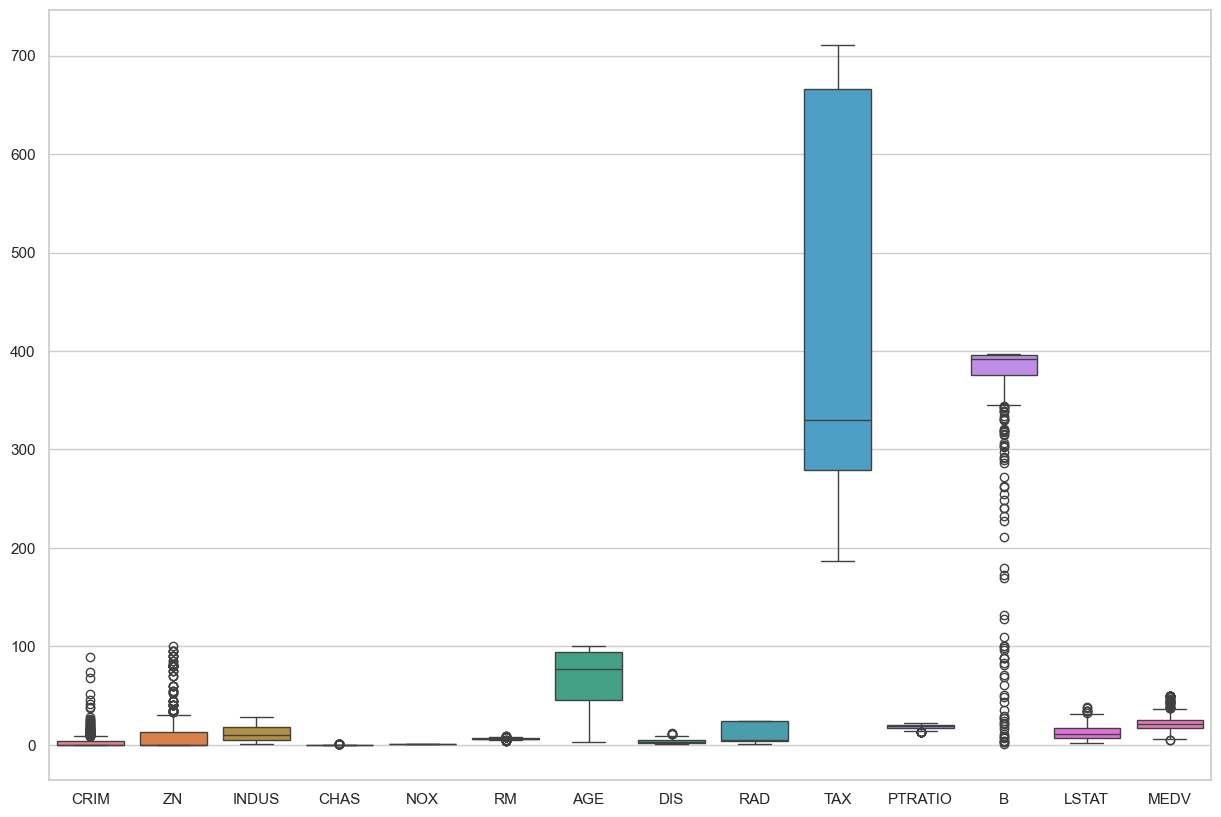

In [38]:
sns.boxplot(data=df)

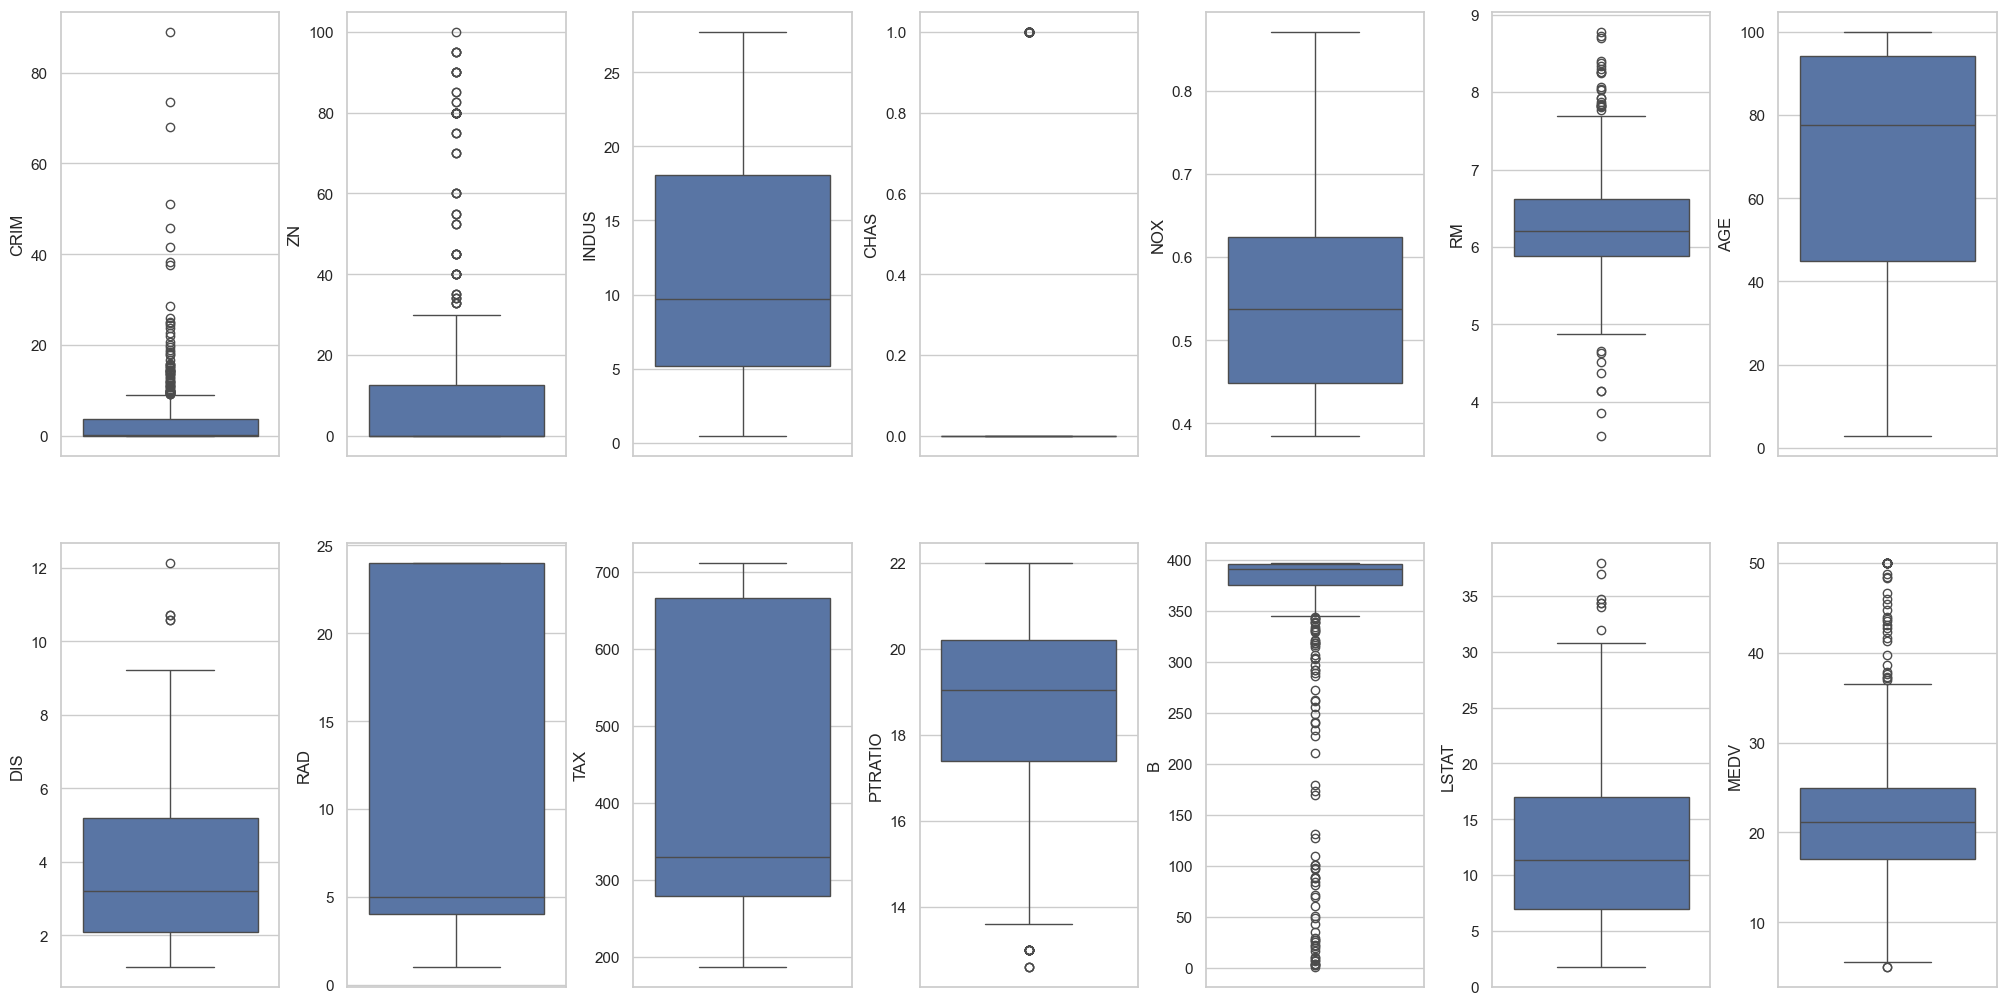

In [39]:
#Como seleccionamos RM como x y MEDV como y
#Verificacmos si existen outliers
#Para diagrama de cajas datos numericos
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k,data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [40]:
 for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [41]:
dfo=df[~(df['MEDV'] >= 50.0)]
print(f'dataframe con ouliers {np.shape(df)}')
print(f'dataframe sin ouliers {np.shape(dfo)}')

dataframe con ouliers (506, 14)
dataframe sin ouliers (490, 14)


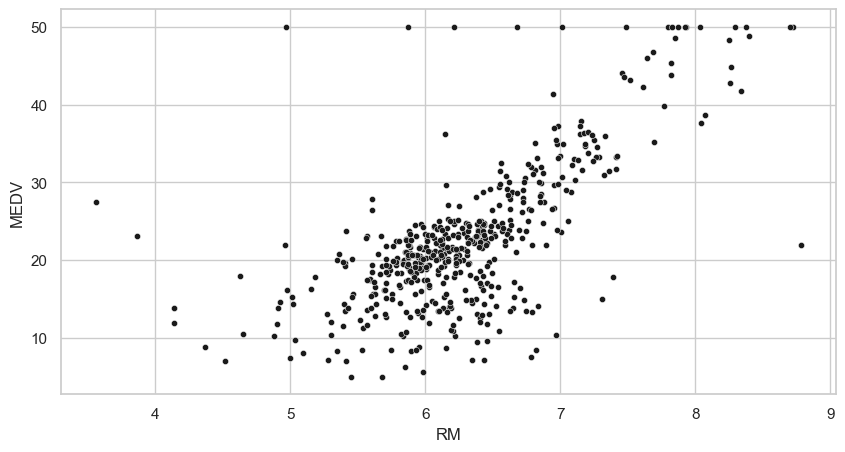

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    data=df,
    x='RM',
    y='MEDV',
    color='.1',
    s=20
);

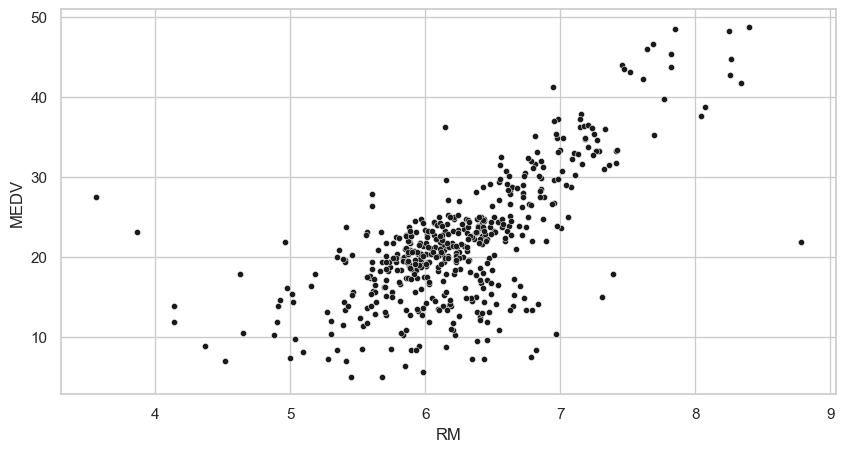

In [43]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    data=dfo,
    x='RM',
    y='MEDV',
    color='.1',
    s=20
);

In [44]:
x2=dfo.RM
y2=dfo.MEDV
pg.corr(x2, y2)

,n,r,CI95%,p-val,BF10,power
pearson,490,0.686634,"[0.64, 0.73]",1.410758e-69,1.117e+66,1.0


In [46]:
pg.corr(x2, y2, method="bicor")

,n,r,CI95%,p-val,power
bicor,490,0.64547,"[0.59, 0.69]",4.329731e-59,1.0


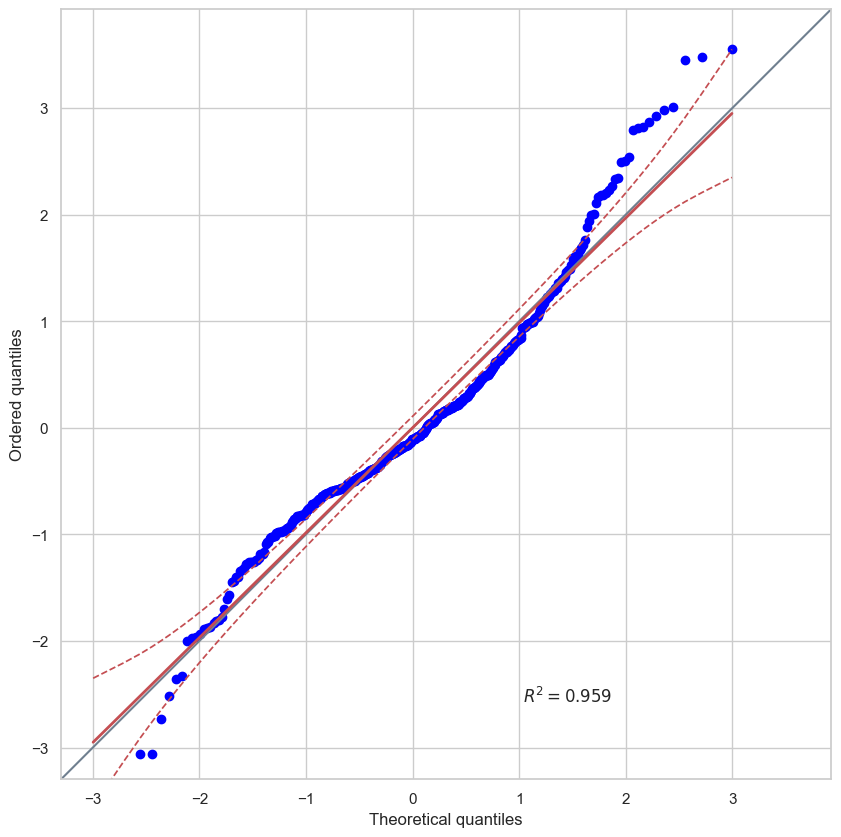

In [48]:
ax = pg.qqplot(x, dist='norm')


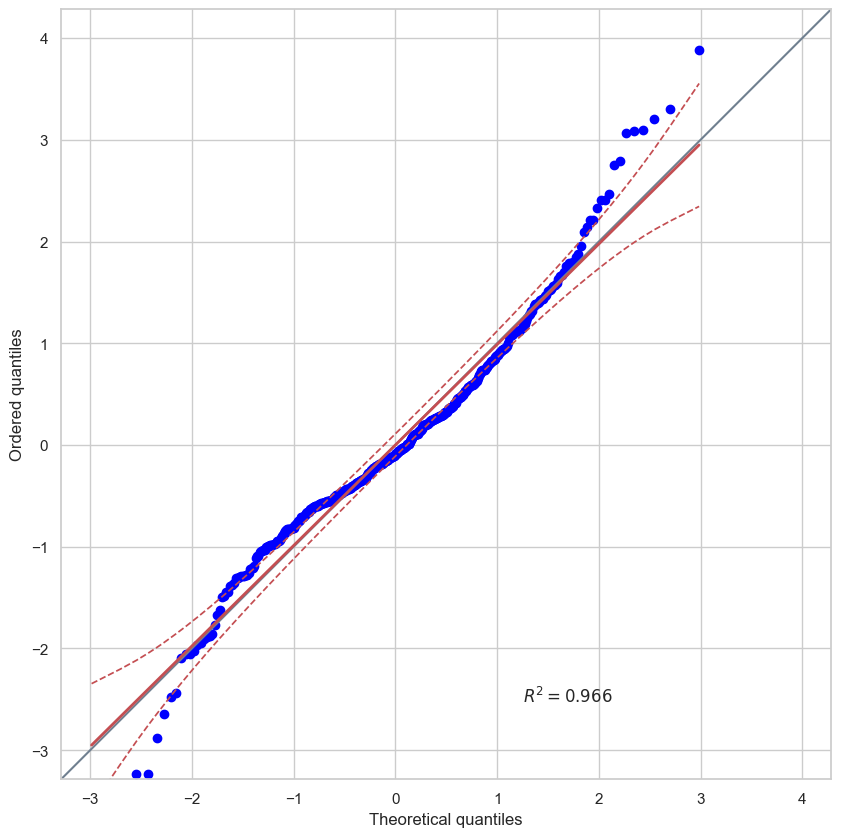

In [47]:
ax = pg.qqplot(x2, dist='norm')

In [49]:
pg.ttest(x, y)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-39.624611,1010,two-sided,6.490168e-208,"[-17.05, -15.44]",2.491178,4.198e+203,1.0


In [50]:
pg.ttest(x2, y2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-43.165983,978,two-sided,1.008631e-228,"[-16.09, -14.69]",2.757773,2.371e+224,1.0


In [51]:
#test de hipotesis
X=dfo.MEDV
Y=dfo.RM
# Calculamos los parámetros del ajuste, a y b, ax+b
ahat, bhat = np.polyfit(X, Y, deg = 1)
# Calculamos los residuos
residuos = Y - (ahat * X + bhat)
# Calculamos la suma cuadrática de los residuos (RSS, residual sum of squares)
RSS = np.sum(residuos**2)
# Calculamos el error estándar de los residuos (RSE, residual standard error)
RSE = np.sqrt(RSS/(len(X)-2))
# Error estándar de la estimación de la pendiente
SEa = np.sqrt(RSE**2 / np.sum((X - X.mean())**2))
# Calculamos el estadístico t
t = ahat / SEa
# Calculamos el p-valor
# Aquí estamos usando scipy.stats 
# donde metemos los grados de libertad (len(X) - 2) 
# y calculamos la CDF del valor t
# Como calculamos la CDF y solo obtenemos una de las 
# colas lo multiplicamos por dos para considerar ambos extremos
p = 2 * (1 - stats.t(len(X) - 2).cdf(t))

print('Valor de la pendiente estimada, a = ', ahat)
print('RSS = ', RSS)
print('RSE = ', RSE)
print('Error estándar = ', SEa)
print('Valor de t = ', t)
print('Valor de p = ', p)

Valor de la pendiente estimada, a =  0.05701921908026274
RSS =  110.25631028193722
RSE =  0.4753262690543728
Error estándar =  0.002732889272479756
Valor de t =  20.86407951264155
Valor de p =  0.0
